In [6]:
import os, sys
sys.path.append(os.path.abspath("../"))
import pandas as pd
from sklearn.model_selection import train_test_split

from utils.bootcampviztools import *
from utils.toolbox_ML import *
from utils.funciones import *

### REVISIÓN INICIAL DEL DATASET

In [3]:
df = pd.read_csv("../data_sample/Datos_Reservas.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155665 entries, 0 to 155664
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   res_ID          155665 non-null  int64  
 1   daily_price     155665 non-null  float64
 2   lead_time       155665 non-null  int64  
 3   adults          155665 non-null  int64  
 4   children        155665 non-null  int64  
 5   repeated_guest  155665 non-null  int64  
 6   total_book      155665 non-null  int64  
 7   pre_cancel      155665 non-null  int64  
 8   arr_date        155665 non-null  object 
 9   arr_week        155665 non-null  int64  
 10  week_nights     155665 non-null  int64  
 11  weekend_nights  155665 non-null  int64  
 12  meal_plan       155665 non-null  object 
 13  room_type       155665 non-null  object 
 14  parking         155665 non-null  int64  
 15  special_req     155665 non-null  int64  
 16  ms_type         155665 non-null  object 
 17  canceled  

In [7]:
df.sample(10)

,res_ID,daily_price,lead_time,adults,children,repeated_guest,total_book,pre_cancel,arr_date,arr_week,week_nights,weekend_nights,meal_plan,room_type,parking,special_req,ms_type,canceled
119537,83262,59.00,33,1,0,0,0,0,2016-01-25,4,1,1,BB,A,0,0,Corporate,0
26815,26815,76.50,92,2,0,0,0,0,2018-04-06,14,1,0,RO,Room_Type 1,0,1,Online,0
111500,75225,62.00,294,2,0,0,1,1,2015-08-07,32,2,0,BB,A,0,0,Groups,1
98179,61904,76.67,16,2,0,0,0,0,2016-12-28,52,4,2,BB,A,0,0,Groups,1
65737,29462,72.00,29,2,0,0,0,0,2016-10-26,43,3,0,HB,A,0,0,Offline,0
92401,56126,113.05,54,2,0,0,0,0,2016-08-29,35,5,2,BB,D,0,0,Direct,1
64912,28637,114.71,188,2,0,0,0,0,2016-09-25,38,10,4,BB,F,0,0,Direct,0
131926,95651,99.45,193,2,0,0,0,0,2016-08-18,33,3,1,BB,A,0,1,Online,0
23704,23704,126.90,124,2,0,0,0,0,2018-06-10,23,2,1,BB,Room_Type 1,0,2,Online,0
1144,1144,90.00,116,2,0,0,0,0,2018-11-17,46,3,0,BB,Room_Type 1,0,1,Online,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
res_ID,155665.0,50010.252979,35288.209707,0.00,19458.0,41557.0,80473.0,119389.0
daily_price,155665.0,102.202207,47.393049,-6.38,73.0,95.0,125.0,5400.0
lead_time,155665.0,99.635332,102.675540,0.00,18.0,66.0,153.0,737.0
adults,155665.0,1.853737,0.565750,0.00,2.0,2.0,2.0,55.0
children,155665.0,0.104211,0.399512,0.00,0.0,0.0,0.0,10.0
repeated_guest,155665.0,0.030450,0.171823,0.00,0.0,0.0,0.0,1.0
total_book,155665.0,0.213156,1.858170,0.00,0.0,0.0,0.0,78.0
pre_cancel,155665.0,0.072258,0.760996,0.00,0.0,0.0,0.0,26.0
arr_week,155665.0,27.594655,13.608094,1.00,17.0,28.0,39.0,53.0
week_nights,155665.0,2.431324,1.809001,0.00,1.0,2.0,3.0,50.0


In [20]:
if len(df[df.duplicated()]) == 0:
    print("No hay registros duplicados")
else:
    print(f"Hay {len(df[df.duplicated()])} registros duplicados")

No hay registros duplicados


<div style="background-color: #e6f3ff;">

---

##### **DESCRIPCIÓN DE LAS VARIABLES**

---
<div style="background-color: AliceBlue;">

| Variable | Tipo | Descripción |
|:---------|:----:|:------------|
| res_ID | int64 | Identificador único de la reserva.|
| daily_price | float64 | Precio diario medio de la reserva efectuada, en euros.|
| lead_time | int64 | Días transcurridos entre la fecha de reserva y el día previsto de llegada.| 
| adults | int64 |---|
| children | int64 |---| 
| repeated_guest | int64 |---| 
| total_book | int64 |---| 
| pre_cancel | int64 |---| 
| arr_date | datetime64 |---|
| arr_week | int64 |---|
| week_nights | int64 |---|
| weekend_nights | int64 |---|
| meal_plan | object |---|
| room_type | object |---|
| parking | int64 |---|
| special_req | int64 |---|
| ms_type | object |---|
| canceled | int64 |---|

</div>

---

<div style="text-align: left;background-color: #e6f3ff;">

En un primer vistazo a los datos del dataset no se aprecian valores nulos ni registros duplicados, aunque se <br>
realizará una inspección más a fondo por si se encontrara alguna inconsistencia en los datos.<br><br>
El primer paso será identificar la variable 'target' y separar los datos en los sets de train y test para evitar el<br>
análisis accidental del dataset de testeto.<br><br>

---
</div>

About columns

    ID : unique identifier of each booking
    n_adults : Number of adults
    n_children : Number of Children
    weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
    week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
    meal_plan : Type of meal plan booked by the customer:
    car_parking_space : Does the customer require a car parking space? (0 - No, 1- Yes)
    room_type : Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
    lead_time : Number of days between the date of booking and the arrival date
    year : Year of arrival date
    month : Month of arrival date
    date : Date of the month
    market_segment : Market segment designation.
    repeated_guest : Is the customer a repeated guest? (0 - No, 1- Yes)
    previous_cancellations : Number of previous bookings that were canceled by the customer prior to the current booking
    previous_bookings_not_canceled : Number of previous bookings not canceled by the customer prior to the current booking
    avg_room_price : Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
    special_requests : Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
    status : Flag indicating if the booking was canceled or not.


### SEPARO LOS DATOS EN CONJUNTOS DE TRAIN Y TEST

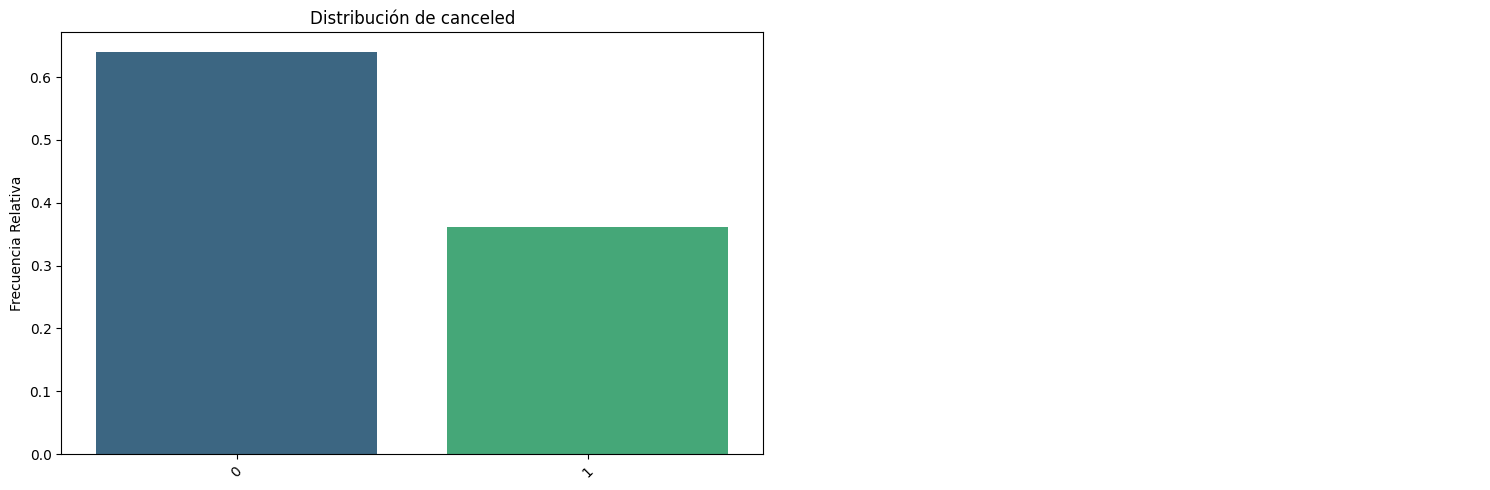

In [21]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)
target = "canceled"

train_set[target].value_counts()
pinta_distribucion_categoricas(train_set, [target], relativa = True)

In [22]:
df_tip = tipifica_variables(train_set, 11, 0.05)
df_tip

,nombre_variable,tipo_sugerido
0,res_ID,Numérica Continua
1,daily_price,Numérica Continua
2,lead_time,Numérica Continua
3,adults,Numérica Discreta
4,children,Categorica
5,repeated_guest,Binaria
6,total_book,Numérica Continua
7,pre_cancel,Numérica Discreta
8,arr_date,Numérica Continua
9,arr_week,Numérica Discreta


In [23]:
lista_cat = df_tip.loc[(df_tip.tipo_sugerido == "Categorica")|(df_tip.tipo_sugerido == "Binaria")]["nombre_variable"].tolist()
lista_cat.remove(target)
lista_cat

['children',
 'repeated_guest',
 'meal_plan',
 'parking',
 'special_req',
 'ms_type']

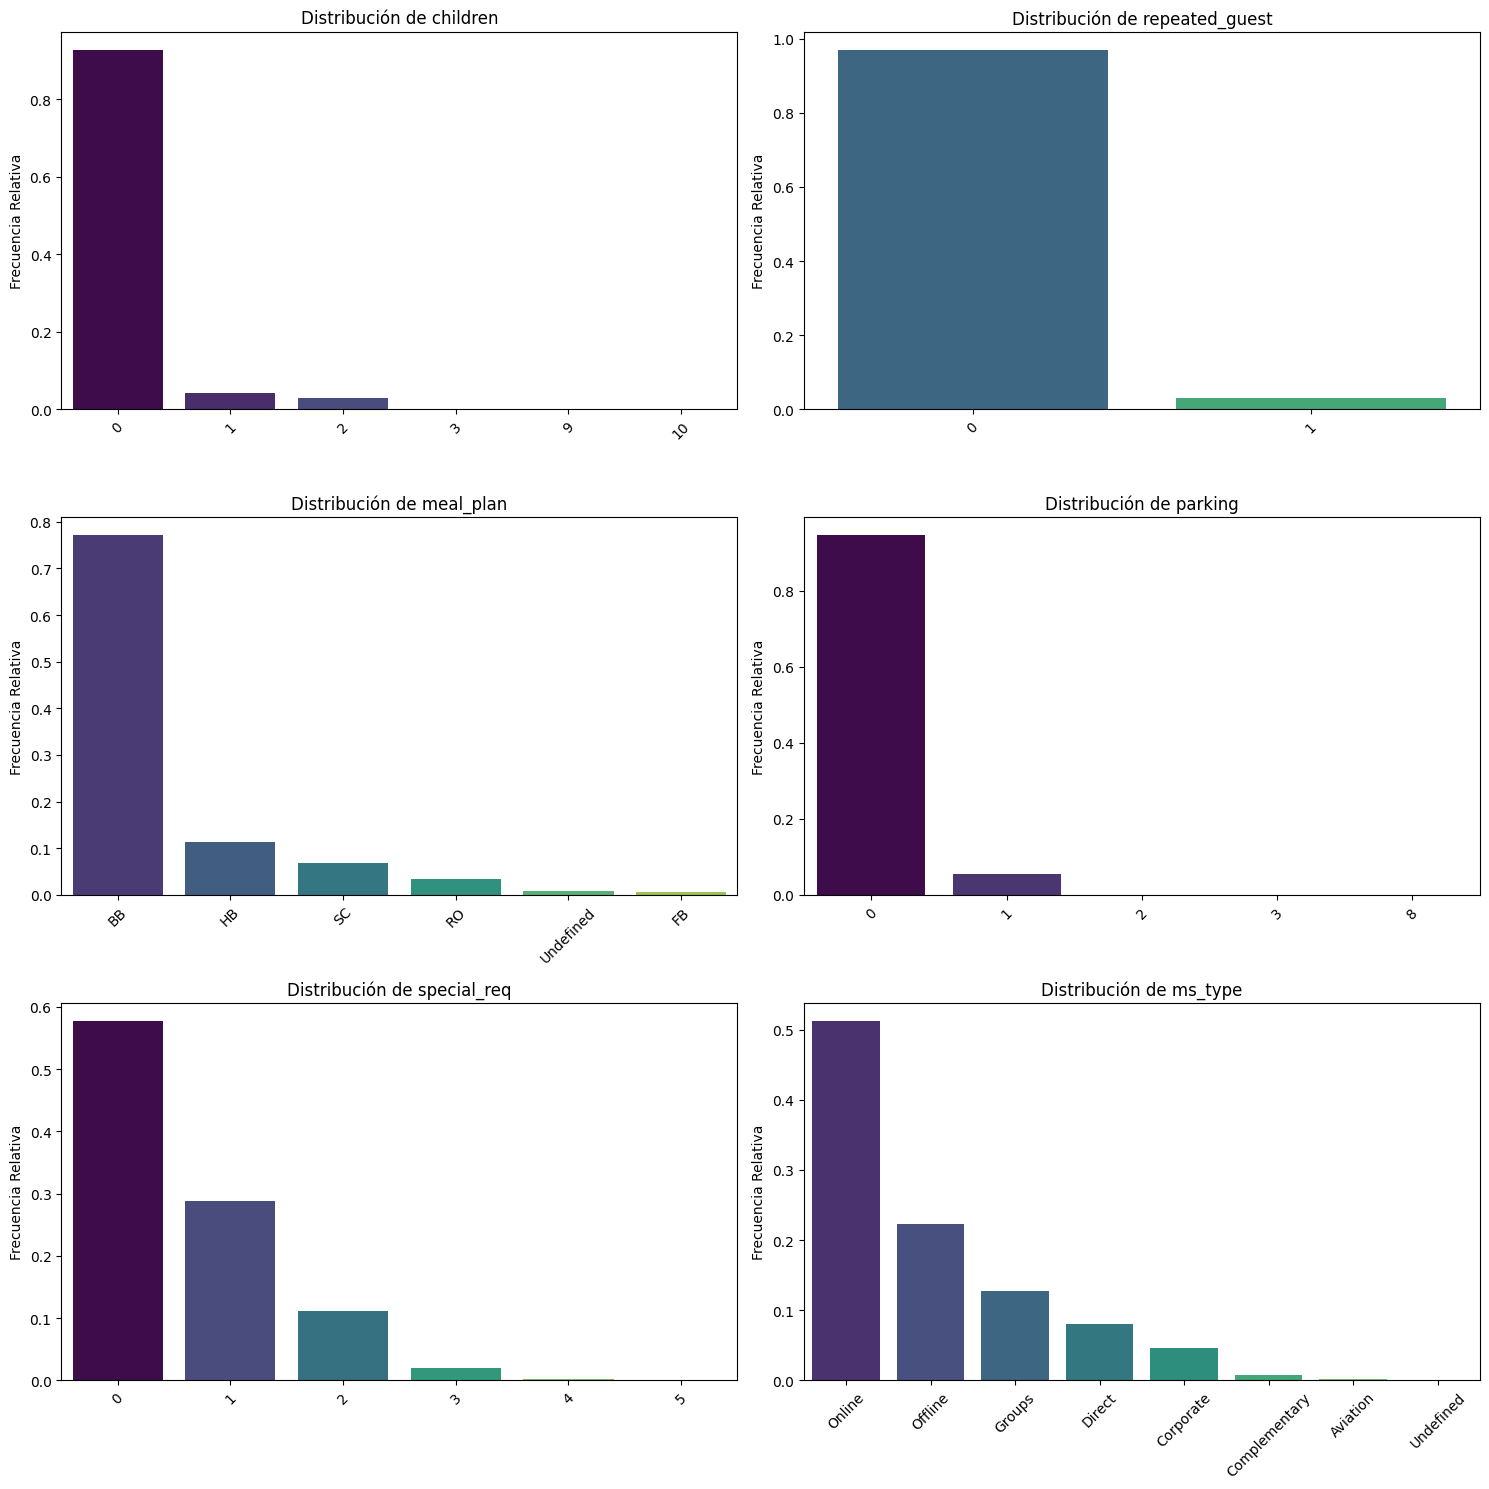

In [24]:
pinta_distribucion_categoricas(train_set, lista_cat, relativa = True, mostrar_valores = False, giro = 45)

In [25]:
lista_num = df_tip.loc[(df_tip.tipo_sugerido != "Categorica")&(df_tip.tipo_sugerido != "Binaria")]["nombre_variable"].tolist()
lista_num

['res_ID',
 'daily_price',
 'lead_time',
 'adults',
 'total_book',
 'pre_cancel',
 'arr_date',
 'arr_week',
 'week_nights',
 'weekend_nights',
 'room_type']

In [26]:
for col in train_set.columns:
    print(train_set[col].value_counts(),"\n")

res_ID
4499      2
32956     2
35849     2
13006     2
11200     2
         ..
105424    1
91310     1
99106     1
54109     1
110831    1
Name: count, Length: 101212, dtype: int64 

daily_price
62.00     3029
75.00     2790
65.00     2591
90.00     2497
0.00      2045
          ... 
79.06        1
175.67       1
135.43       1
183.10       1
100.18       1
Name: count, Length: 8206, dtype: int64 

lead_time
0      6117
1      3634
2      2161
3      1958
4      1897
       ... 
709       1
463       1
371       1
380       1
737       1
Name: count, Length: 475, dtype: int64 

adults
2     92619
1     24566
3      6829
0       441
4        63
26        4
20        2
27        2
5         2
40        1
6         1
55        1
10        1
Name: count, dtype: int64 

children
0     115508
1       5195
2       3750
3         75
9          2
10         2
Name: count, dtype: int64 

repeated_guest
0    120735
1      3797
Name: count, dtype: int64 

total_book
0     116256
1       5936
2    

### TRANSFORMACIONES

In [27]:
# TRANSFORMACIONES A OTRAS CATEGÓRICAS

# Convierto en binarias las variables 'children' y 'parking'
lista_cambios = ["children","parking"]
for col in lista_cambios:
    cambiar_numerica_binaria (df,col)

In [28]:
df.parking.value_counts()

parking
0    147125
1      8540
Name: count, dtype: int64

In [29]:
df.children.value_counts()

children
0    144377
1     11288
Name: count, dtype: int64

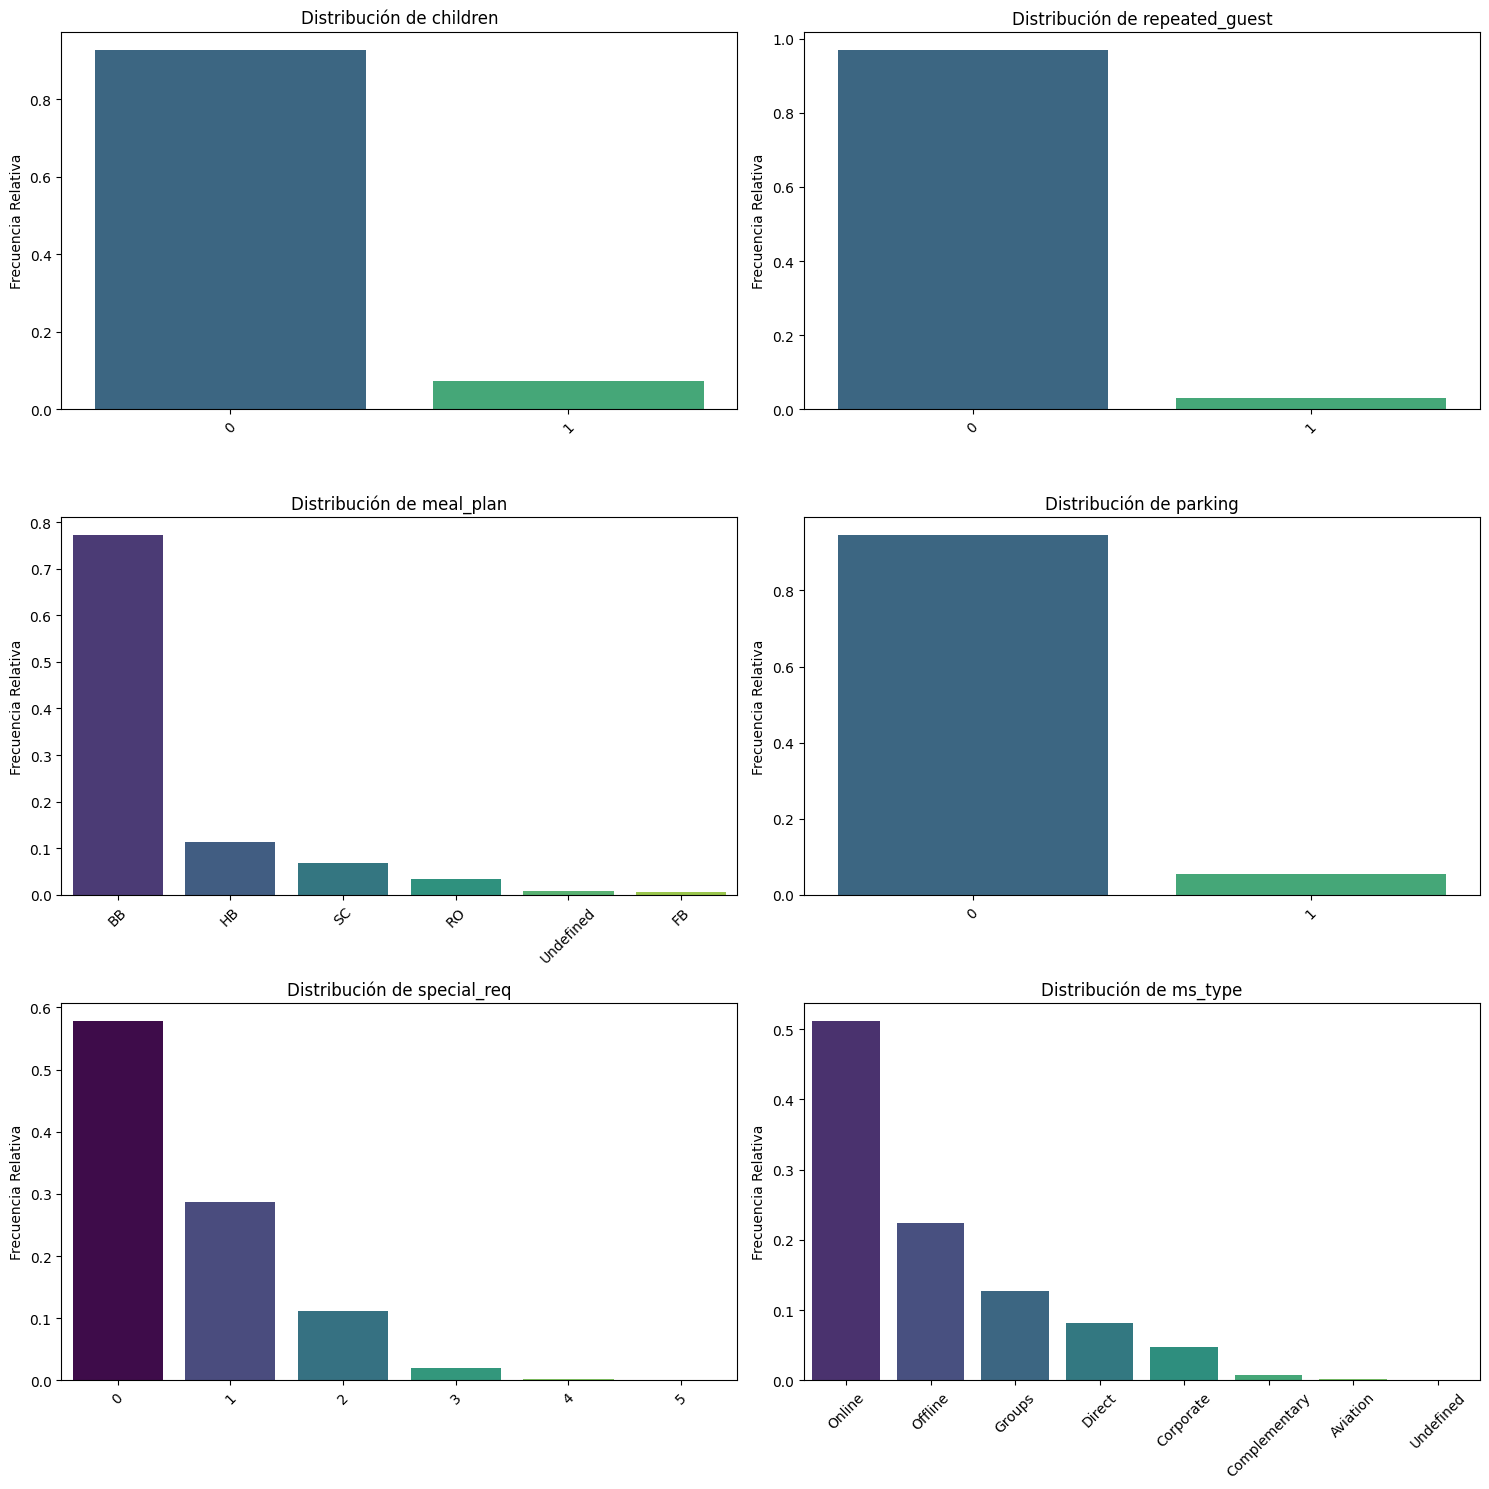

In [30]:
pinta_distribucion_categoricas(df, lista_cat, relativa = True, mostrar_valores = False, giro = 45)